In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import implied_helper as ih
import requests
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Get Tickers for most active stock options

In [2]:
PATH = r"C:\Users\rosha\finmath\QTS\buy-rough-sell-smooth\buy-rough-sell-smooth\most_active_stock_options.csv"

In [ ]:
# Load the CSV file
most_active_stock_options = pd.read_csv(PATH)

# Display the first few rows of the dataframe
most_active_stock_options.head()

,ticker,options_volume,ticker_type,options_volume_call,options_volume_put,volume_put_call_ratio,open_interest,open_interest_call,open_interest_put,open_interest_put_call_ratio,iv_rank,implied_volatility_30d,ticker_name,average_daily_volume_percent
0,TSLA,1165487.0,STOCK,664610.0,500877.0,0.753640,7459451.0,4039008.0,3420443.0,0.846852,56.153846,61.16,"Tesla, Inc.",52.51
1,NVDA,1013873.0,STOCK,675574.0,338299.0,0.500758,21808455.0,11264476.0,10543979.0,0.936038,56.085584,64.68,NVIDIA Corporation,23.32
2,SMCI,685029.0,STOCK,331827.0,353202.0,1.064416,3514776.0,1782304.0,1732472.0,0.972041,31.292689,108.84,"Super Micro Computer, Inc.",76.90
3,PLTR,335457.0,STOCK,213800.0,121657.0,0.569022,3616906.0,2050346.0,1566560.0,0.764047,61.907680,68.19,Palantir Technologies Inc.,27.96
4,AMZN,319143.0,STOCK,250655.0,68488.0,0.273236,3636195.0,2095881.0,1540314.0,0.734924,28.393195,29.64,"Amazon.com, Inc.",52.21


In [14]:
# Add a new column for the sum of options_volume_call and options_volume_put
most_active_stock_options['total_options_volume'] = most_active_stock_options['options_volume_call'] + most_active_stock_options['options_volume_put']

# Get the top 50 tickers with the highest total options volume
top_50_tickers = most_active_stock_options.nlargest(50, 'total_options_volume')

# Display the top 50 tickers
top_50_tickers




,ticker,options_volume,ticker_type,options_volume_call,options_volume_put,volume_put_call_ratio,open_interest,open_interest_call,open_interest_put,open_interest_put_call_ratio,iv_rank,implied_volatility_30d,ticker_name,average_daily_volume_percent,total_options_volume
0,TSLA,1165487.0,STOCK,664610.0,500877.0,0.753640,7459451.0,4039008.0,3420443.0,0.846852,56.153846,61.16,"Tesla, Inc.",52.51,1165487.0
1,NVDA,1013873.0,STOCK,675574.0,338299.0,0.500758,21808455.0,11264476.0,10543979.0,0.936038,56.085584,64.68,NVIDIA Corporation,23.32,1013873.0
2,SMCI,685029.0,STOCK,331827.0,353202.0,1.064416,3514776.0,1782304.0,1732472.0,0.972041,31.292689,108.84,"Super Micro Computer, Inc.",76.90,685029.0
3,PLTR,335457.0,STOCK,213800.0,121657.0,0.569022,3616906.0,2050346.0,1566560.0,0.764047,61.907680,68.19,Palantir Technologies Inc.,27.96,335457.0
4,AMZN,319143.0,STOCK,250655.0,68488.0,0.273236,3636195.0,2095881.0,1540314.0,0.734924,28.393195,29.64,"Amazon.com, Inc.",52.21,319143.0
5,META,246995.0,STOCK,186814.0,60181.0,0.322144,1994872.0,1134813.0,860059.0,0.757886,21.690141,31.57,Meta Platforms (Facebook),44.74,246995.0
6,BABA,228484.0,STOCK,167483.0,61001.0,0.364222,2645715.0,1779768.0,865947.0,0.486550,75.021988,52.85,Alibaba Group Holding Limited,36.82,228484.0
7,LCID,197489.0,STOCK,47201.0,150288.0,3.184000,1407791.0,666547.0,741244.0,1.112066,50.655840,96.05,"Lucid Group, Inc.",259.15,197489.0
8,NIO,185570.0,STOCK,161450.0,24120.0,0.149396,3049070.0,1923206.0,1125864.0,0.585410,43.614030,89.99,NIO Inc.,122.33,185570.0
9,IBIT,179033.0,STOCK,122490.0,56543.0,0.461613,2464091.0,1573836.0,890255.0,0.565659,11.718339,47.94,iShares Bitcoin Trust ETF,45.02,179033.0


In [5]:
top_50_ticker_symbols = top_50_tickers['ticker'].tolist()
print(top_50_ticker_symbols)

['TSLA', 'NVDA', 'SMCI', 'PLTR', 'AMZN', 'META', 'BABA', 'LCID', 'NIO', 'IBIT', 'AMD', 'GOOGL', 'MSFT', 'APP', 'MSTR', 'HOOD', 'HIMS', 'F', 'GOOG', 'NKLA', 'AVGO', 'INTC', 'SOFI', 'MU', 'AMC', 'WMT', 'SAVE', 'GM', 'SQ', 'TSM', 'COIN', 'MARA', 'ZI', 'PYPL', 'ASTS', 'FSLR', 'IREN', 'BAC', 'CAVA', 'DKNG', 'NLY', 'XPEV', 'NYCB', 'SNOW', 'FCX', 'TEM', 'SOUN', 'VRT', 'NFLX', 'RIVN']


In [6]:
current_year = 2023

In [7]:
api_key = "UVOO8K6JL3BPN3OO"

In [116]:
def get_options_data(symbol, date):
    year = date.year
    month = date.month
    date_str = date.strftime('%Y-%m-%d')
    print(f"Getting options data for {symbol} for {date_str}")
    url = f"https://www.alphavantage.co/query?function=HISTORICAL_OPTIONS&symbol={symbol}&apikey={api_key}&date={date_str}&&datatype=json"
    r = requests.get(url)
    data = r.json()
    options_df = pd.DataFrame(data['data'])
    return options_df



In [117]:
def get_stock_data(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={api_key}&datatype=json&outputsize=full"
    response = requests.get(url)
    data = response.json()
    
    # Extract the time series data
    time_series = data['Time Series (Daily)']
    
    # Convert the time series data to a DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    
    # Rename the columns
    df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient']
    
    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)
    
    # Convert the columns to numeric
    df = df.apply(pd.to_numeric)
    
    return df


# tsla_data = get_stock_data('TSLA', api_key)

In [118]:
def power_law(tau, C, H):
    """ Power-law function: phi(tau) = C * tau^(H - 1/2) """
    return C * tau**(H - 0.5)

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def get_atm_skew_slope(ticker, date, stock_price, options_data, method='mid', flag_plot=True):
    """
    Computes the ATM skew slope using two methods:
    
    1. 'mid' - Fits a cubic spline to the mid implied volatility of call and put options.
    2. 'separated' - Uses put IVs for strikes below stock price and call IVs for strikes above.

    Parameters:
        ticker (str): Ticker symbol of the stock.
        date (str): Date of the options data.
        stock_price (float): The current stock price.
        options_data (DataFrame): A DataFrame containing option chains with columns ['strike', 'type', 'implied_volatility'].
        method (str): Either 'mid' or 'separated'.
        flag_plot (bool): Whether to plot the implied volatility curves.

    Returns:
        float: The ATM skew slope (first derivative of IV w.r.t log-moneyness at ATM).
    """

    # Convert columns to numeric
    options_data.loc[:, 'strike'] = pd.to_numeric(options_data['strike'], errors='coerce')
    options_data.loc[:, 'implied_volatility'] = pd.to_numeric(options_data['implied_volatility'], errors='coerce')

    # Separate calls and puts
    call_options = options_data[options_data['type'] == 'call']
    put_options = options_data[options_data['type'] == 'put']

    if method == 'mid':
        # Merge calls and puts on strike price
        merged = pd.merge(call_options, put_options, on='strike', suffixes=('_call', '_put'))
        
        # Ensure no NaNs
        merged = merged.dropna(subset=['implied_volatility_call', 'implied_volatility_put'])
        
        # Compute the mid implied volatility
        merged['mid_iv'] = (merged['implied_volatility_call'] + merged['implied_volatility_put']) / 2
        merged['strike'] = pd.to_numeric(merged['strike'], errors='coerce')  # Ensure numeric
        merged = merged.dropna(subset=['strike'])  # Drop NaNs
        merged['log(K/S)'] = np.log(merged['strike'].astype(float) / float(stock_price))  # Ensure float division


        log_ks = merged['log(K/S)'].values
        vols_calls = merged['implied_volatility_call'].values
        vols_puts = merged['implied_volatility_put'].values
        vols_mid = merged['mid_iv'].values

    elif method == 'separated':
        # Get puts below stock price and calls above stock price
        puts = put_options[put_options['strike'] < stock_price].copy()
        calls = call_options[call_options['strike'] > stock_price].copy()

        puts.loc[:, 'log(K/S)'] = np.log(puts['strike'] / stock_price)
        calls.loc[:, 'log(K/S)'] = np.log(calls['strike'] / stock_price)

        # Concatenate put and call data
        log_ks = np.concatenate([puts['log(K/S)'].values, calls['log(K/S)'].values])
        vols = np.concatenate([puts['implied_volatility'].values, calls['implied_volatility'].values])

    else:
        raise ValueError("Invalid method. Choose 'mid' or 'separated'.")

    # Sort data for proper spline fitting
    sorted_indices = np.argsort(log_ks)
    log_ks_sorted = log_ks[sorted_indices]
    vols_calls_sorted = np.array(vols_calls)[sorted_indices]
    vols_puts_sorted = np.array(vols_puts)[sorted_indices]
    vols_mid_sorted = np.array(vols_mid)[sorted_indices]

    # Fit cubic spline for mid-IV
    spline = CubicSpline(log_ks_sorted, vols_mid_sorted)

    # Compute the ATM skew slope (first derivative at log(K/S) = 0)
    atm_skew_slope = spline.derivative()(0).item()

    if flag_plot and method == 'mid':
        plt.figure(figsize=(12, 6))

        # Plot Calls IV
        plt.scatter(log_ks_sorted, vols_calls_sorted, color='blue', marker='o', label='Call IV', alpha=0.6)
        
        # Plot Puts IV
        plt.scatter(log_ks_sorted, vols_puts_sorted, color='red', marker='s', label='Put IV', alpha=0.6)

        # Plot Mid IV and Spline Fit
        x_range = np.linspace(log_ks_sorted.min(), log_ks_sorted.max(), 500)
        plt.scatter(log_ks_sorted, vols_mid_sorted, color='green', marker='^', label='Mid IV', alpha=0.8)
        plt.plot(x_range, spline(x_range), color='black', linestyle='--', label='Mid IV Spline Fit')

        plt.axvline(0, color='r', linestyle='--', label='ATM Strike')
        plt.xlabel('log(K/S)')
        plt.ylabel('Implied Volatility')
        plt.title(f'IV Curves for {ticker} on {date}')
        plt.legend()
        plt.show()

    return atm_skew_slope


In [184]:
def get_time_to_expiry(expiration, current_date):
    return (pd.to_datetime(expiration) - current_date).days / 365.0

In [185]:
from sklearn.linear_model import LinearRegression
import math
import statsmodels.api as sm


def get_h_value(ticker, date, stock_price, options_data, flag_plot_image=True):
    unique_expirations = options_data['expiration'].unique()
    expiration_phi_pairs = []
    for expiration in unique_expirations:
        print(f'Ticker: {ticker}, Date: {date}, Expiration: {expiration}')
        options_data_filtered = options_data[options_data['expiration'] == expiration]
        phi = get_atm_skew_slope(ticker, date, stock_price, options_data_filtered, "mid", True)
        time_to_expiry = get_time_to_expiry(expiration, date)

        expiration_phi_pairs.append((time_to_expiry, phi))

    # Sort based on time_to_expiry
    expiration_phi_pairs.sort(key=lambda x: x[0])

    # Plot expiration vs phi
    expirations, phis = zip(*expiration_phi_pairs)
    expirations = np.array(expirations)
    phis = np.array(phis)
    # print(expirations)
    # print(phis)
    # abs_phis = np.abs(phis)


    # # Take logs
    # log_tau = np.log(expirations)
    # log_phi = np.log(abs_phis)
    
    # # Perform linear regression
    # X = sm.add_constant(log_tau)  # Add intercept
    # model = sm.OLS(log_phi, X).fit()
    
    # # Extract slope and calculate H
    # slope = model.params[1]
    # H_value = slope + 0.5
    # print(f'H Value: {H_value}')
    
    # plt.figure(figsize=(10, 6))
    # plt.plot(expirations, abs_phis, marker='o', linestyle='-', color='b', label='|Phi| vs Expiration')
    # plt.xlabel('Time to Expiration (years)')
    # plt.ylabel('|Phi|')
    # plt.title(f'Expiration vs |Phi| for {ticker} on {date}')
    # plt.grid(True)
    
    # # Plot the fitted curve
    # fitted_phi = np.exp(model.predict(X))
    # plt.plot(expirations, fitted_phi, linestyle='--', color='r', label='Fitted Curve')
    
    # plt.legend()
    # plt.show()
    
    # return H_value
    popt, _ = curve_fit(power_law, expirations, phis, p0=(1, 0.5), maxfev=10000)
    C_opt, H_opt = popt
    fitted_phi = power_law(expirations, C_opt, H_opt)

    if flag_plot_image:
        
        # Plot original data
        plt.figure(figsize=(10, 6))
        plt.plot(expirations, phis, marker='o', linestyle='-', color='b', label="Phi vs Expiration")
        
        # Plot fitted power-law curve
        plt.plot(expirations, fitted_phi, linestyle="--", color="r", label="Fitted Power-Law Curve")
        
        plt.xlabel("Time to Expiration (years)")
        plt.ylabel("Phi")
        plt.title("Power-Law Fit: Phi vs Expiration")
        plt.legend()
        plt.grid(True)
        plt.show()

    print(f"Optimized H Value: {H_opt}")
    return H_opt






Ticker: IBM, Date: 2023-01-03 00:00:00
Getting options data for IBM for 2023-01-03
Options Data Shape: (1054, 20)
Stock Price: 129.248359336314
Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-01-06


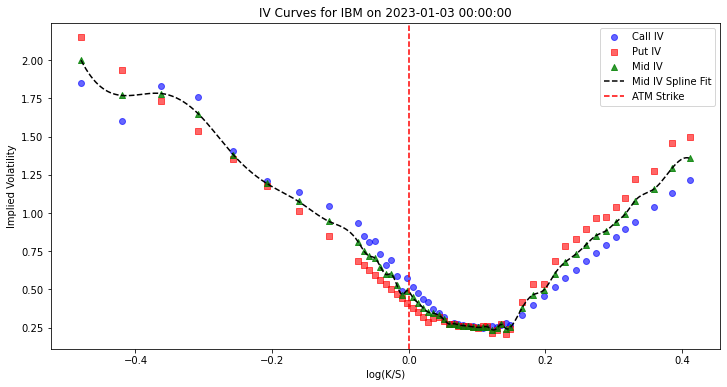

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-01-13


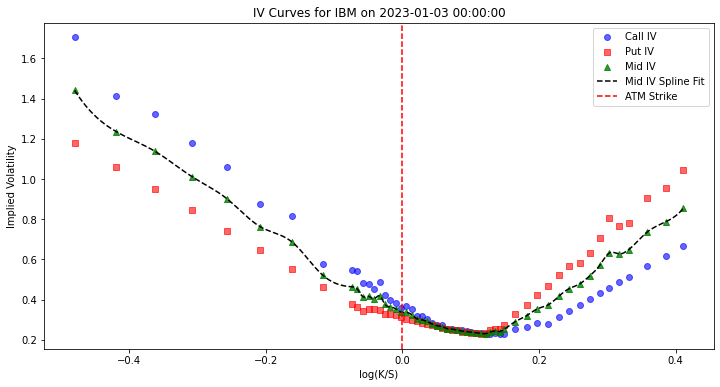

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-01-20


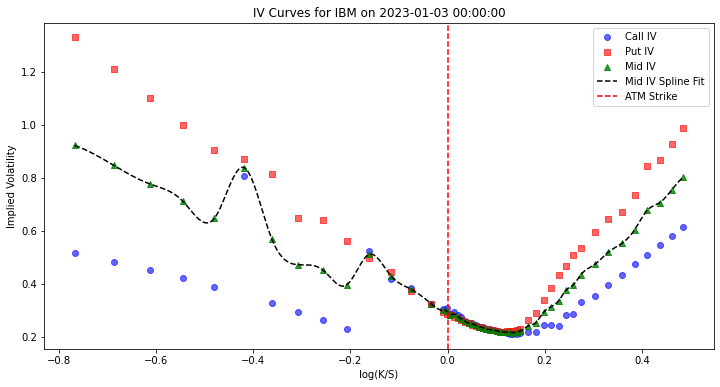

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-01-27


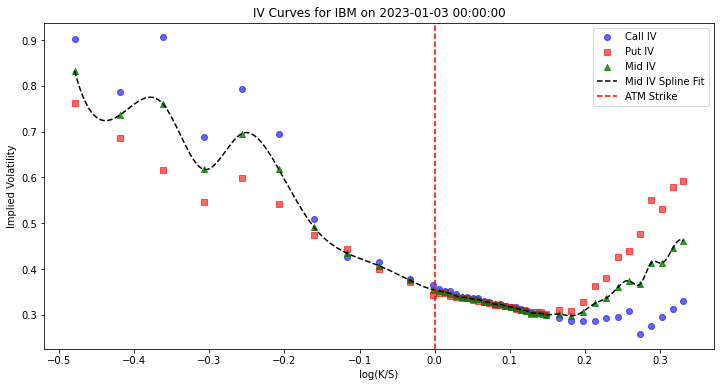

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-02-03


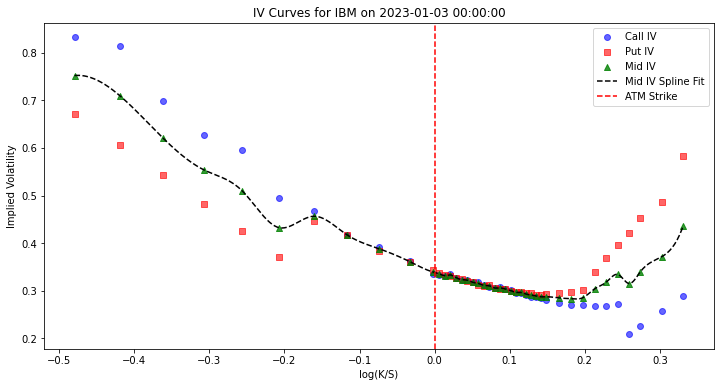

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-02-10


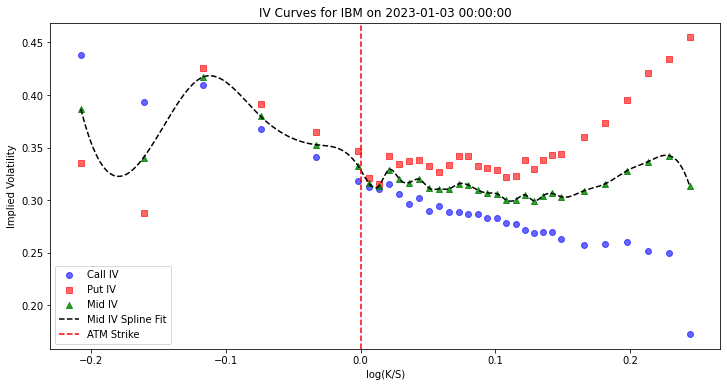

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-02-17


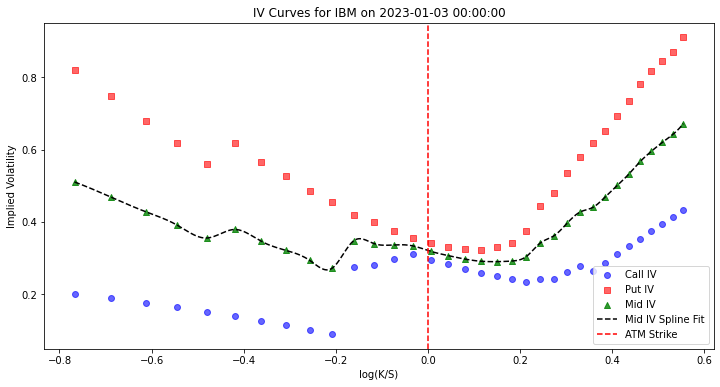

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-03-17


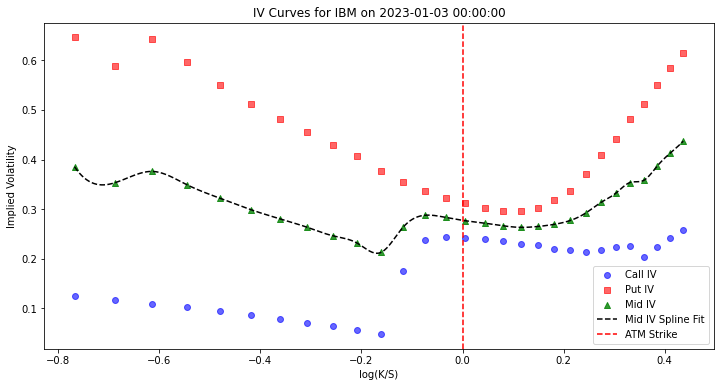

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-04-21


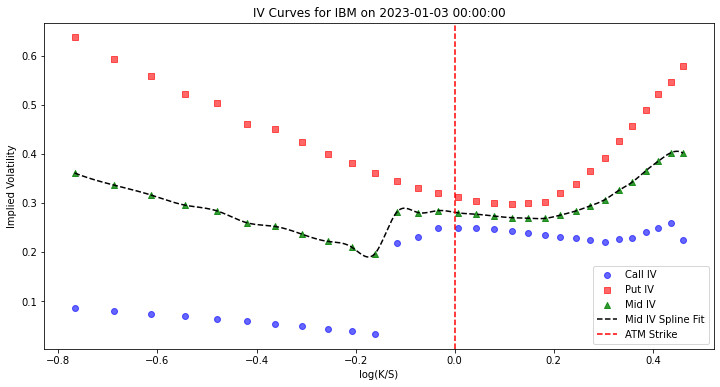

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-06-16


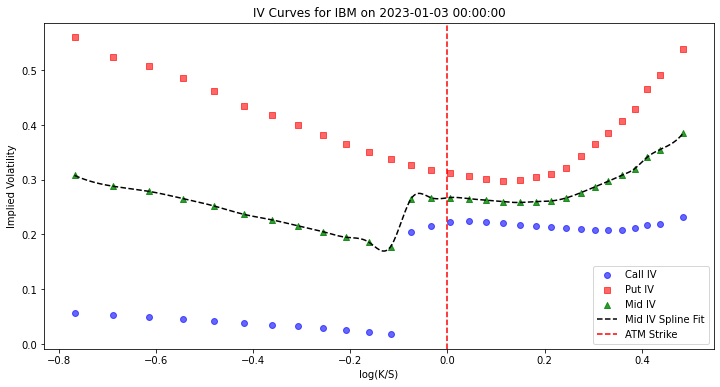

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2023-07-21


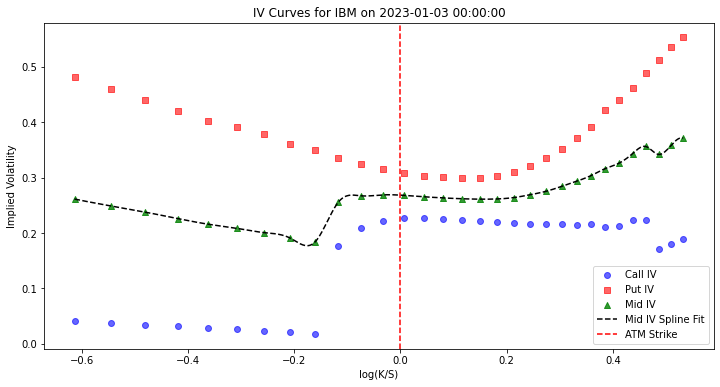

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2024-01-19


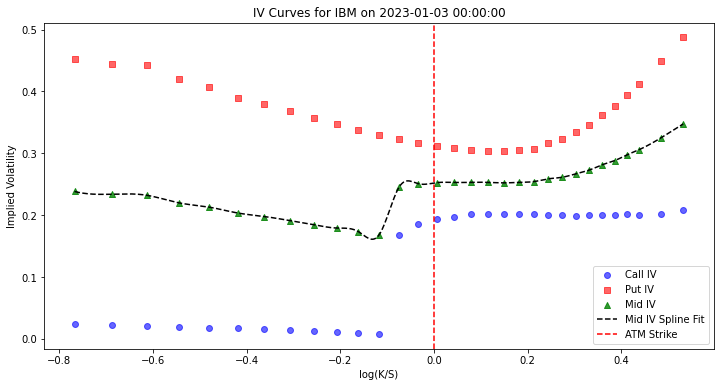

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2024-06-21


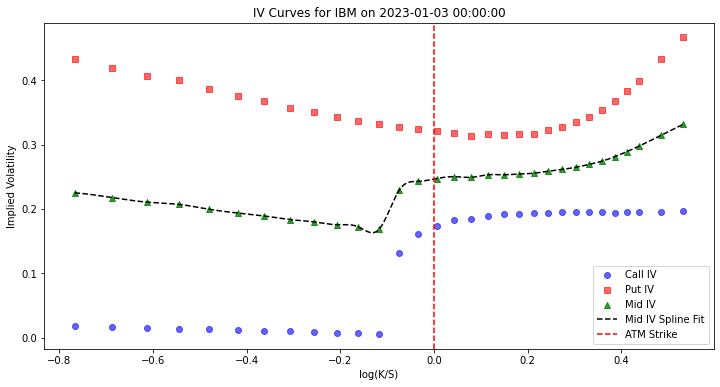

Ticker: IBM, Date: 2023-01-03 00:00:00, Expiration: 2025-01-17


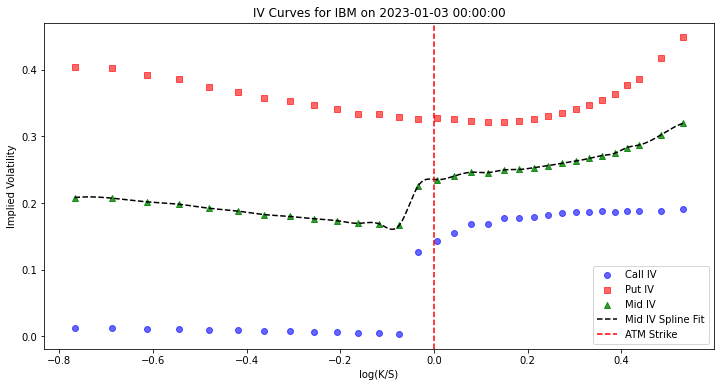

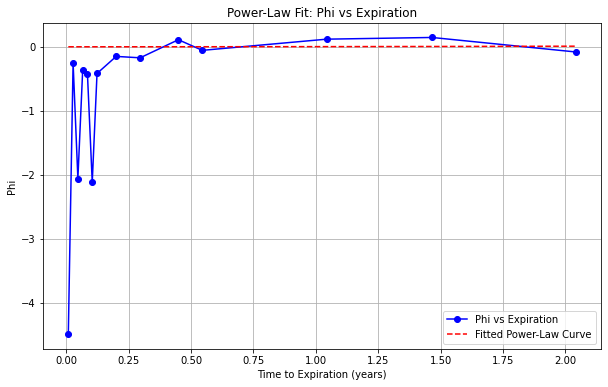

Optimized H Value: 2.422160658100121
2.422160658100121


,TSLA,IBM
2023-01-03,NaN,2.422161
2023-01-04,NaN,NaN
2023-01-05,NaN,NaN
2023-01-06,NaN,NaN
2023-01-09,NaN,NaN


In [186]:
import pandas_market_calendars as mcal

# Get the trading calendar for NYSE
nyse = mcal.get_calendar('NYSE')


h_values_df = pd.DataFrame(index=series, columns=['TSLA'])

for ticker in ['IBM']:
    stocks_data = get_stock_data(ticker, api_key)
    stocks_data.reset_index(inplace=True)
    stocks_data = stocks_data.rename(columns={'index': 'date'})
    stocks_data['Date'] = pd.to_datetime(stocks_data['date'])
    
    for year in range(current_year, current_year + 1):
        trading_dates = nyse.valid_days(start_date=f'{year}-01-01', end_date=f'{year}-12-31')
        series = pd.Series(trading_dates.to_pydatetime())  # Converts to a timezone-naive Series
        series = series.dt.tz_localize(None).dt.normalize()
        
        for date in series:
            print(f'Ticker: {ticker}, Date: {date}')
            options_data = get_options_data(ticker, date)
            print(f'Options Data Shape: {options_data.shape}')
            adjusted_close_value = stocks_data[stocks_data['Date'] == date]
            stock_price = adjusted_close_value['adjusted_close'].values[0]
            print(f'Stock Price: {stock_price}')            
            h_value = get_h_value(ticker, date, stock_price, options_data, True)
            print(h_value)
            h_values_df.loc[date, ticker] = h_value
            break

h_values_df.head()
            # break


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                


In [187]:
stocks_data.shape

(6369, 10)

In [188]:
stocks_data.head()

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Date
0,2025-02-26,258.100,258.325,254.4104,255.84,255.84,3460124,0.0,1.0,2025-02-26
1,2025-02-25,261.080,263.480,256.7700,257.75,257.75,6292487,0.0,1.0,2025-02-25
2,2025-02-24,261.500,263.845,259.5800,261.87,261.87,4398107,0.0,1.0,2025-02-24
3,2025-02-21,263.845,264.830,261.1000,261.48,261.48,5667874,0.0,1.0,2025-02-21
4,2025-02-20,263.650,265.090,262.1500,264.74,264.74,4884805,0.0,1.0,2025-02-20


In [189]:
adjusted_close_value = stocks_data[stocks_data['Date'] == '2023-01-03']
adjusted_close_value

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Date
538,2023-01-03,141.1,141.9,140.48,141.55,129.248359,3338829,0.0,1.0,2023-01-03


In [190]:
# Get the descriptive statistics
description = h_values_df['TSLA'].describe()
print(description)

# Calculate specific percentiles
percentiles = h_values_df['TSLA'].quantile([0.25, 0.5, 0.75])
print(percentiles)

count       0
unique      0
top       NaN
freq      NaN
Name: TSLA, dtype: object
0.25   NaN
0.50   NaN
0.75   NaN
Name: TSLA, dtype: float64


In [191]:
h_values_df

,TSLA,IBM
2023-01-03,NaN,2.422161
2023-01-04,NaN,NaN
2023-01-05,NaN,NaN
2023-01-06,NaN,NaN
2023-01-09,NaN,NaN
...,...,...
2023-12-22,NaN,NaN
2023-12-26,NaN,NaN
2023-12-27,NaN,NaN
2023-12-28,NaN,NaN
